<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/stock_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance==0.2.43 --q

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.cluster import KMeans
import yfinance as yf
import numpy as np
import pandas as pd

# Step 1: Define the stock symbols and time period
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_niftysmallcap250list.csv"
nifty50 = pd.read_csv(nifty50_url)
stock_symbols = nifty50['Symbol'].tolist()
start_date = '2024-06-01'
end_date = '2024-12-01'
# Assuming `stock_symbols`, `start_date`, and `end_date` are defined
stoplist = ['ADANIENT.NS', 'ADANIGREEN.NS']  # List of symbols to skip
data = {}
failed_symbols = []  # To keep track of failed downloads

# Fetch historical data for each stock
for symbol in stock_symbols:
    # Skip symbols in the stoplist
    if symbol in stoplist:
        print(f"Symbol {symbol} is in the stoplist. Skipping...")
        continue

    try:
        # Download stock data
        stock_data = yf.download(symbol, start=start_date, end=end_date)

        # Check if data is not empty
        if not stock_data.empty:
            data[symbol] = stock_data['Adj Close']
        else:
            print(f"Symbol {symbol} has no data. Skipping...")
            failed_symbols.append(symbol)
    except Exception as e:
        # Catch and handle any exceptions
        print(f"Failed to download {symbol}: {e}")
        failed_symbols.append(symbol)

# Print results
print(f"Downloaded data for: {list(data.keys())}")
print(f"Failed to download data for: {failed_symbols}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Downloaded data for: ['360ONE.NS', 'AADHARHFC.NS', 'AARTIIND.NS', 'AAVAS.NS', 'ACE.NS', 'ABREL.NS', 'ABSLAMC.NS', 'AEGISLOG.NS', 'AFFLE.NS', 'AKUMS.NS', 'APLLTD.NS', 'ALKYLAMINE.NS', 'ALOKINDS.NS', 'ARE&M.NS', 'AMBER.NS', 'ANANDRATHI.NS', 'ANANTRAJ.NS', 'ANGELONE.NS', 'APARINDS.NS', 'APTUS.NS', 'ACI.NS', 'ASAHIINDIA.NS', 'ASTERDM.NS', 'ASTRAZEN.NS', 'ATUL.NS', 'AVANTIFEED.NS', 'BASF.NS', 'BEML.NS', 'BLS.NS', 'BALAMINES.NS', 'BALRAMCHIN.NS', 'BATAINDIA.NS', 'BIKAJI.NS', 'BIRLACORPN.NS', 'BSOFT.NS', 'BLUEDART.NS', 'BLUESTARCO.NS', 'BBTC.NS', 'BRIGADE.NS', 'MAPMYINDIA.NS', 'CCL.NS', 'CESC.NS', 'CIEINDIA.NS', 'CAMPUS.NS', 'CANFINHOME.NS', 'CAPLIPOINT.NS', 'CGCL.NS', 'CASTROLIND.NS', 'CEATLTD.NS', 'CELLO.NS', 'CENTRALBK.NS', 'CDSL.NS', 'CENTURYPLY.NS', 'CERA.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 'CHEMPLASTS.NS', 'CHENNPETRO.NS', 'CHOLAHLDNG.NS', 'CUB.NS', 'CLEAN.NS', 'CAMS.NS', 'CONCORDBIO.NS', 'CRAFTSMAN.NS', 'CREDITACC.NS', 'CROMPTON.NS', 'CYIENT.NS', 'DOMS.NS', 'DATAPATTNS.NS', 'DEEPAKFERT.

In [7]:
# Step 3: Combine data into a single DataFrame
df = pd.DataFrame(data)
# Step 4: Check and Handle Missing Values (NaN)

# Fill missing values and drop any remaining NaN rows
df = df.ffill().bfill()  # Forward and backward fill
#df = df.dropna()  # Drop rows with persistent NaN values

# Verify that there are no missing values



In [11]:

returns = df.pct_change().dropna()
mean_returns = returns.mean() * 30  # Annualized return
volatility = returns.std() * np.sqrt(30)  # Annualized volatility

# Step 5: Prepare the data for clustering
features = pd.DataFrame({
    'Annualized Return': mean_returns,
    'Volatility': volatility
})
# Filter stocks with return >= 10% and volatility < 15%
features = features[(features['Annualized Return'] >= 0.10) & (features['Volatility'] < 0.25)]

# Step 6: Use KMeans to identify clusters
kmeans = KMeans(n_clusters=5, random_state=42)
features['Cluster'] = kmeans.fit_predict(features)


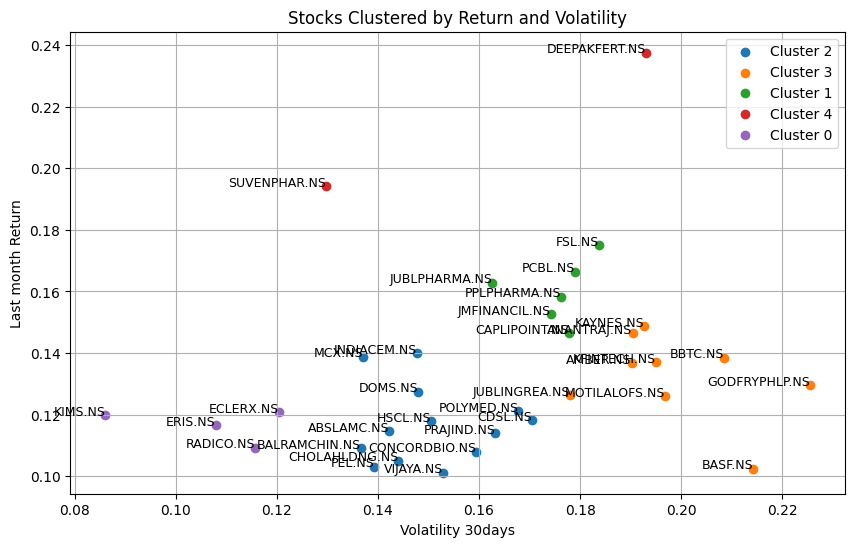

In [12]:

# Step 7: Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in features['Cluster'].unique():
    cluster_data = features[features['Cluster'] == cluster]
    plt.scatter(cluster_data['Volatility'], cluster_data['Annualized Return'], label=f'Cluster {cluster}')
# Add stock names to the points
for i, row in features.iterrows():
    plt.text(row['Volatility'], row['Annualized Return'], i, fontsize=9, ha='right')


plt.title('Stocks Clustered by Return and Volatility')
plt.xlabel('Volatility 30days')
plt.ylabel('Last month Return')
plt.legend()
plt.grid(True)
plt.show()